#Introduction
The objective of the current text is to analyse crime patterns in San Francisco.

In [38]:
base_url <- "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/"
crimeSF_url <- paste(base_url, "sanfrancisco_incidents_summer_2014.csv",sep="")
download.file(crimeSF_url, "crimeSF_url.csv", method = "curl")
crimeSF <- read.csv("crimeSF_url.csv")


In [39]:
names(crimeSF)
levels(crimeSF$PdDistrict)

[1] "IncidntNum" "Category"   "Descript"   "DayOfWeek"  "Date"      
 [6] "Time"       "PdDistrict" "Resolution" "Address"    "X"         
[11] "Y"          "Location"   "PdId"

[1] "BAYVIEW"    "CENTRAL"    "INGLESIDE"  "MISSION"    "NORTHERN"  
 [6] "PARK"       "RICHMOND"   "SOUTHERN"   "TARAVAL"    "TENDERLOIN"

In [40]:
#head(crimeSF)
library(ggplot2)
library(plyr)
library(stringr)
#summary(crimeSF)
#levels(crimeSF$Category)
crimeSFrel <- crimeSF[, c("Category", "DayOfWeek","Time","PdDistrict")]
#crimeSFrel <-  ddply(crimeSFrel, .(Category,DayOfWeek, Time), transform, Hour = str_split(Time, ":") )
x <-  with(crimeSFrel,str_split_fixed(Time, ":",2) )
#class(x)
#head(x)
crimeSFrel$Hour <- as.factor(x[, 1])
#head(crimeSFrel)
#need to group time to obtain larger groups
CatHour <- ddply(crimeSFrel, .(Category,DayOfWeek, Hour,PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
summary(CatHour$Category)
summary(CatHour$PdDistrict)
#nrow(CatHour)


ARSON                     ASSAULT 
                         55                        1149 
                    BRIBERY                    BURGLARY 
                          1                           6 
         DISORDERLY CONDUCT DRIVING UNDER THE INFLUENCE 
                         30                          87 
              DRUG/NARCOTIC                 DRUNKENNESS 
                        608                         135 
               EMBEZZLEMENT                   EXTORTION 
                         10                           7 
            FAMILY OFFENSES      FORGERY/COUNTERFEITING 
                          9                          17 
                      FRAUD                    GAMBLING 
                        213                           1 
                 KIDNAPPING               LARCENY/THEFT 
                        111                        1491 
                LIQUOR LAWS                   LOITERING 
                         33                           3 
             MISSING PERSON                NON-CRIMINAL 
                        502                        1184 
             OTHER OFFENSES     PORNOGRAPHY/OBSCENE MAT 
                       1262                           1 
               PROSTITUTION                     ROBBERY 
                         49                         266 
                    RUNAWAY             SECONDARY CODES 
                         56                         361 
            STOLEN PROPERTY                     SUICIDE 
                          7                          14 
             SUSPICIOUS OCC                    TRESPASS 
                        816                         248 
                  VANDALISM               VEHICLE THEFT 
                         17                         951 
                   WARRANTS                 WEAPON LAWS 
                        855                         259

BAYVIEW    CENTRAL  INGLESIDE    MISSION   NORTHERN       PARK   RICHMOND 
      1227       1101       1061       1453       1167        801        733 
  SOUTHERN    TARAVAL TENDERLOIN 
      1382        870       1019

In [41]:
#head(crimeSFrel)
#Assault = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimesConsidered = c("ASSAULT","FRAUD","VEHICLE THEFT")
Crimes = crimeSFrel[crimeSFrel$Category %in% CrimesConsidered,]
#AssaultTime <- ddply(Assault, .(DayOfWeek, Hour), nrow)
#head(CatHour)
#summary(CatHour)
#summary(AssaultTime)
#names(AssaultTime) <- gsub("V1", "Assaults", names(AssaultTime))
#AssaultTimePlot <- ggplot(AssaultTime, aes(Hour,Assaults, group= DayOfWeek )) + geom_line(aes(colour=DayOfWeek ))
#AssaultTimePlot

          Category    DayTipe               Hour           V1        
 ASSAULT      :48   Length:139         00     :  6   Min.   :  1.00  
 VEHICLE THEFT:48   Class :character   01     :  6   1st Qu.:  7.00  
 FRAUD        :43   Mode  :character   02     :  6   Median : 28.00  
 ARSON        : 0                      03     :  6   Mean   : 36.62  
 BRIBERY      : 0                      06     :  6   3rd Qu.: 52.50  
 BURGLARY     : 0                      07     :  6   Max.   :130.00  
 (Other)      : 0                      (Other):103                   

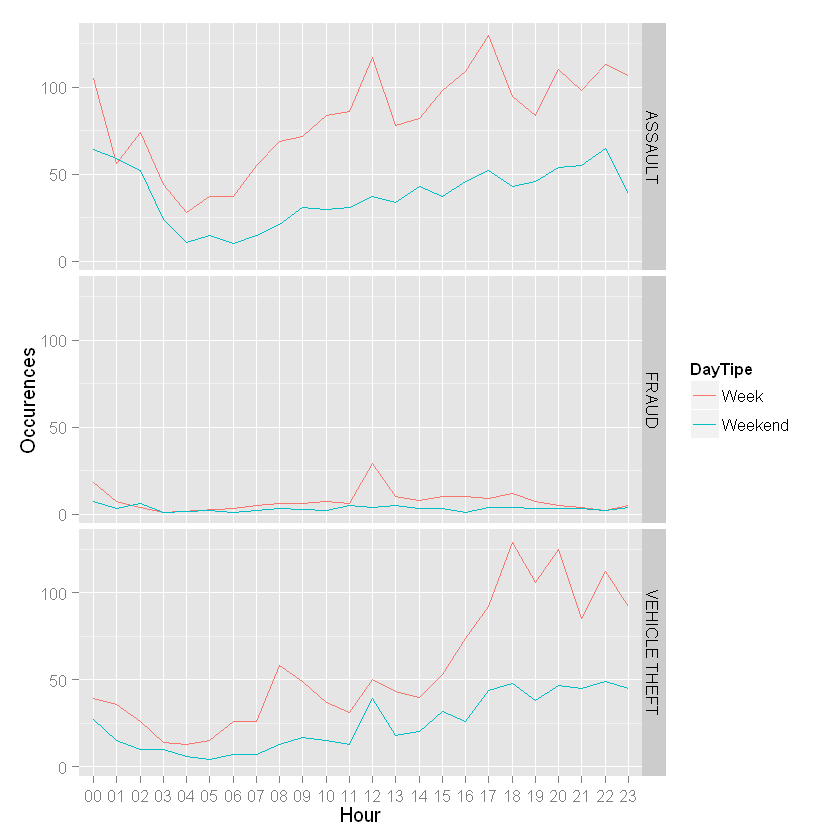

In [42]:
#head(CatHour)
Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimeTime <- ddply(Crimes, .(Category,DayTipe, Hour), nrow)
#head(CatHour)
#summary(CatHour)
summary(CrimeTime)
names(CrimeTime) <- gsub("V1", "Occurences", names(CrimeTime))
CrimeTimePlot <- ggplot(CrimeTime, aes(Hour,Occurences, group= DayTipe )) + geom_line(aes(colour=DayTipe ))
#CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
CrimeTimePlot + facet_grid(Category ~ .)

,Hour,PdDistrict,Occurences
1,00,BAYVIEW,44
2,00,CENTRAL,21
3,00,INGLESIDE,33
4,00,MISSION,41
5,00,NORTHERN,24
6,00,PARK,10
7,00,RICHMOND,18
8,00,SOUTHERN,33
9,00,TARAVAL,20
10,00,TENDERLOIN,16


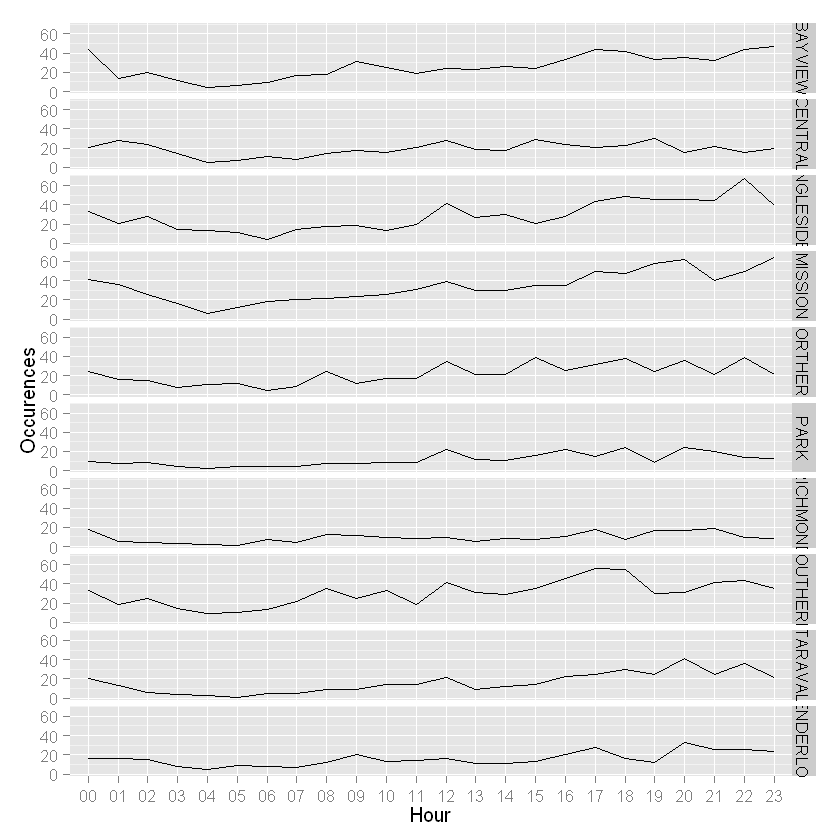

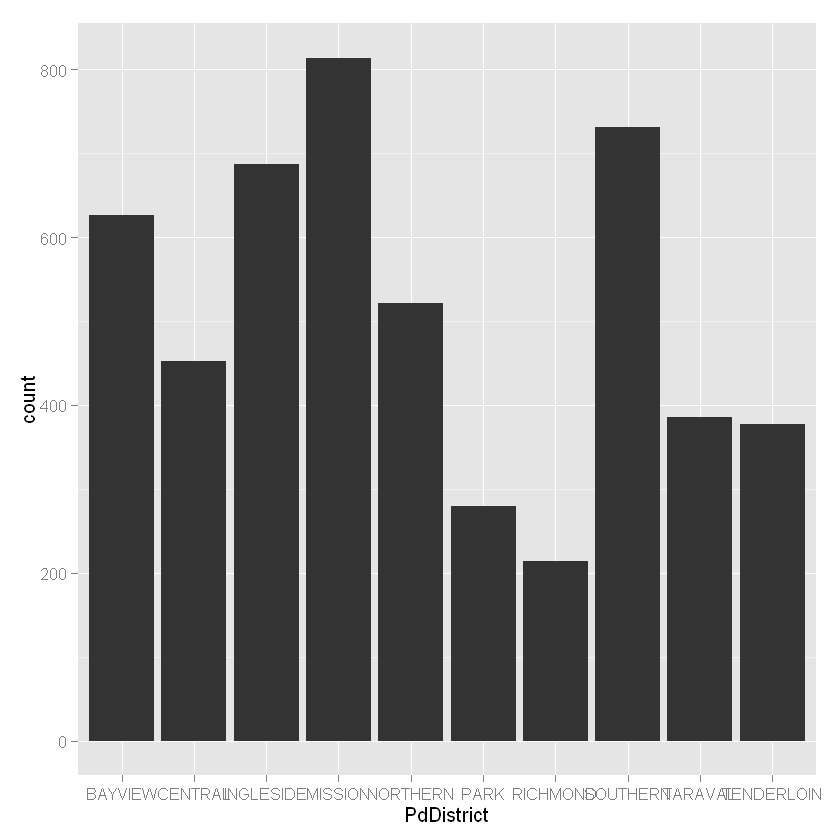

In [70]:
#Crimes$DayTipe <- with(Crimes, ifelse(DayOfWeek == "Saturday" | DayOfWeek == "Sunday", "Weekend", "Week"))
CrimePlace = crimeSFrel[crimeSFrel$Category == "ASSAULT",]
CrimePlace <- ddply(Crimes, .(Hour, PdDistrict), nrow)
#head(CatHour)
#summary(CatHour)
#summary(CrimePlace)
names(CrimePlace) <- gsub("V1", "Occurences", names(CrimePlace))
head(CrimePlace,10)
CrimePlacePlot <- ggplot(CrimePlace, aes(Hour ,Occurences, group = 1)) + geom_line() + facet_grid(PdDistrict ~ .,  space= "free_y" )
CrimePlacePlot
#CrimeTimePlot + facet_grid(Category ~ ., scale = "free_y")
#CrimePlacePlot + facet_grid(PdDistrict ~ ., scale = "free_y")
CrimePlace2 <- ddply(Crimes, .( PdDistrict), nrow)
names(CrimePlace2) <- gsub("V1", "Occurences", names(CrimePlace2))
ggplot(Crimes, aes(PdDistrict)) + geom_bar()